# C4021 - Group Project 2.3
--------------------------------------------

# Effects of Crime on Average House Price
------

### Description
Linear regression will be used to identify the impact, if any, of crime on average house prices in Ireland.

### Databases
A custom dataset was created from three sources to apply the analysis:
- **Residential Property Price Register:** https://www.propertypriceregister.ie/website/npsra/pprweb.nsf/PPRDownloads?OpenForm
- **Crimes at Garda Stations Level:** https://data.gov.ie/dataset/crimes-at-garda-stations-level-2010-2016
- **Census 2016 Preliminary Results:** https://data.gov.ie/dataset/census-2016-preliminary-results

The **Residential Price Property Register** is compiled from data which is filed for stamp duty purposes with the Revenue Commissioners. This data was used to calculate the Average House Price for each town in Ireland (where available), based on houses sold over the past 3 years.

The **Crimes at Garda Stations** database is compiled from CSO data and contains details of criminal offences recorded in the 563 Garda Stations in Ireland between 2004 and 2016. This data was used to calculate the total criminal offences recorded for those towns.

The **Census 2016 Preliminary Results** database is based on the results are the initial count of the 2016 census as released by the CSO. This data was used to calculate a per capita Crime Rate for each town using the total criminal offences from the previous database.

The resulting dataset for analysis contains 563 rows representing towns in Ireland, with each column containing the related **Average_House_Price** and **Crime_Rate**.

### Sources
------

Each file should list the sources of applied techniques where you have significantly duplicated 3rd party work. Providing links under the above 4 headings is sufficient. Where you have not used 3rd partly work significantly, please state this explicitly.

#### Training data

#### Pre-processing

#### Algorithm training and evaluation
- http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

#### Visualisation of outputs
- https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/


### Contributions
------

Briefly describe the contributions of each group member to the following aspects:

#### Training data

#### Pre-processing
- Inspiration taken from Abhi's solution for handling the null values

#### Algorithm training and evaluation

#### Visualisation of outputs


## Loading/ Creating Data
-----

In [239]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [240]:
#Load the dataset and convert to pandas data frame
dataframe = pd.read_csv("crime_houseprice_dataset.csv")

#Check dimensions
dataframe.shape

(563, 3)

In [241]:
#View first 5 rows
dataframe.head(5)

,Total_Crimes,Crime_Rate,House_Price
0,523,NaN,NaN
1,75613,NaN,NaN
2,672,NaN,NaN
3,1968,NaN,NaN
4,6536,NaN,NaN


## Pre-processing
-----

In [242]:
#Remove NaN
dataframe.isnull().sum()

Total_Crimes     0
Crime_Rate      44
House_Price     11
dtype: int64

In [243]:
dataframe.dropna(axis=0, inplace = True)
dataframe.shape

(516, 3)

In [244]:
#View first 5 rows
dataframe.head(5)

,Total_Crimes,Crime_Rate,House_Price
44,665,2.09,142829.0
45,66231,0.83,275000.0
46,81247,1.07,321389.0
47,74505,1.00,242764.0
48,67122,1.25,128196.0


In [245]:
#Assign X
X = dataframe.drop('House_Price', axis = 1)

#Assign Y
Y = dataframe['House_Price']

In [246]:
# Create linear regression object
lm = linear_model.LinearRegression()

## Training
-----

In [247]:
# Split the data into training/testing sets
X_train = X[:-100]
X_test = X[-100:]

print(X_train.shape)
print(X_test.shape)

(416, 2)
(100, 2)


In [248]:
# Split the targets into training/testing sets
Y_train = Y[:-100]
Y_test = Y[-100:]

print(Y_train.shape)
print(Y_test.shape)

(416,)
(100,)


In [249]:
# Train the model using the training sets
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [252]:
# Make predictions using the testing set
Y_pred = lm.predict(X_test)

## Evaluation
------

In [253]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  3.12487462 590.91325982]


In [254]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))

Mean squared error: 5712815877.15


In [256]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Variance score: -0.03


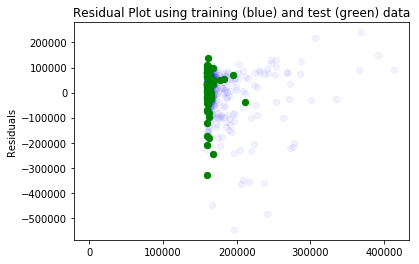

In [257]:
# Residual plots
# good way to visualize the errors in your data
# If you have done a good job then your data should be randomly scattered around line zero. 
# If you see structure in your data, that means your model is not capturing some thing

plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s = 40, alpha = 0.05)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s = 40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()

## Outputs & Visualisations
------

In [227]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [228]:
print('Estimated intercept coefficient: ', lm.intercept_)

Estimated intercept coefficient:  155299.46398036298


In [229]:
print('Number of coefficients: ', len(lm.coef_))

Number of coefficients:  2


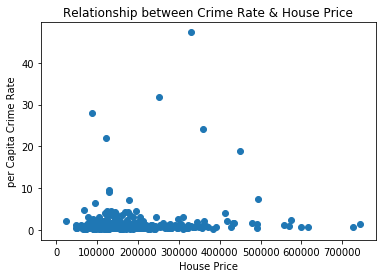

In [260]:
plt.scatter(dataframe.House_Price, dataframe.Crime_Rate)
plt.ylabel("per Capita Crime Rate")
plt.xlabel("House Price")
plt.hlines(y = 0, xmin = 0, xmax = 10)
plt.title("Relationship between Crime Rate & House Price")
plt.show()

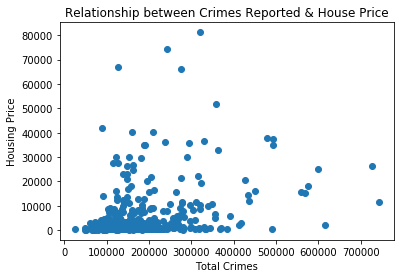

In [261]:
plt.scatter(dataframe.House_Price, dataframe.Total_Crimes)
plt.xlabel("Total Crimes")
plt.ylabel("Housing Price")
plt.title("Relationship between Crimes Reported & House Price")
plt.show()

In [262]:
lm.predict(X)[0:5]

array([161848.4362758 , 365989.41509009, 413054.35160913, 391945.0829737 ,
       369021.86194817])